## Problem Statement : 
## 3.	Develop Multilayer Perceptron Models for Time Series Forecasting 

Libraies Required

In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

Data Set : Room Temprature time series dataset


Data Preprocessing

In [14]:
Datset = '../Data/Time-Series/MLTempDataset1.csv'
df = pd.read_csv(Datset)
# Convert 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

df = df.sort_values('Datetime')
# Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

scaler = MinMaxScaler()
df['Hourly_Temp'] = scaler.fit_transform(df['Hourly_Temp'].values.reshape(-1, 1))

# Create sequences for training
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)
sequence_length = 10
X, y = create_sequences(df['Hourly_Temp'], sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\marut\AppData\Local\Temp\ipykernel_20680\3117257072.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


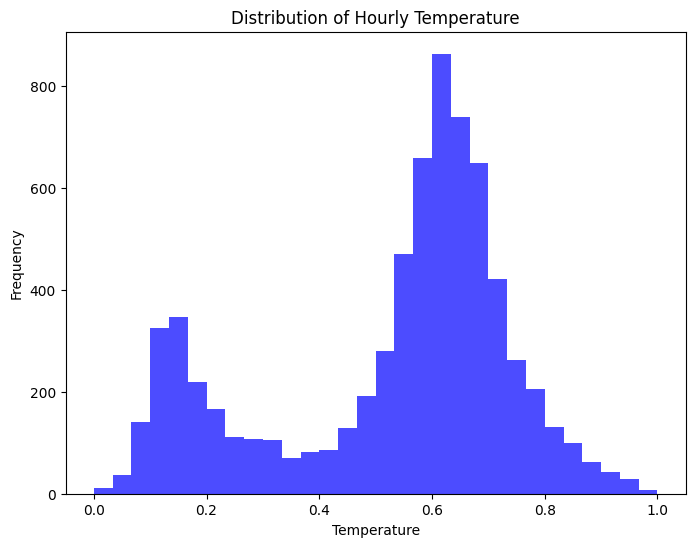

In [27]:
# Histogram of Temperature Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Hourly_Temp'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Hourly Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

Neural Network Design 

In [28]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)
mlp_regressor.fit(X_train, y_train)



MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)

Metrics 

In [36]:

# Make predictions on the test set
test_predictions = mlp_regressor.predict(X_test)

# Inverse transform predictions to the original scale
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1))

# Inverse transform the actual values to the original scale
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate and print Mean Squared Error on the test set
mse = mean_squared_error(y_test_original, test_predictions_original)
r2 =r2_score(y_test_original, test_predictions_original)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'R2 score on Test Set: {r2}')



Mean Squared Error on Test Set: 43.63727032121878
R2 score on Test Set: 0.003089421225747513


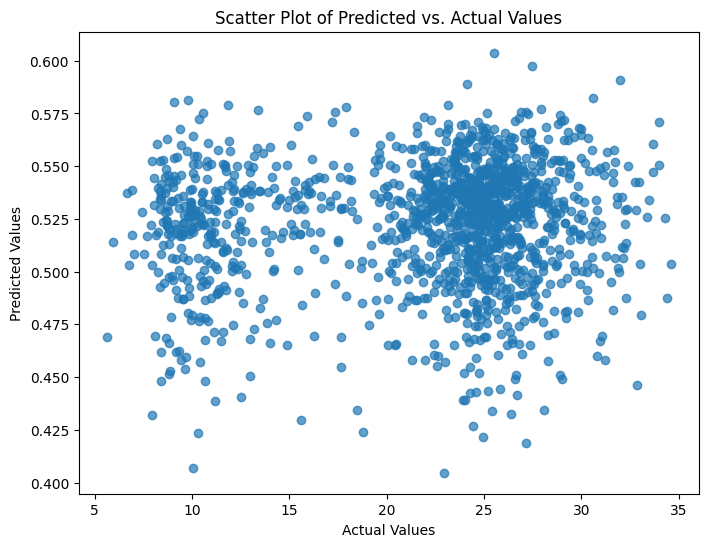

In [33]:

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original,test_predictions , alpha=0.7)
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
